In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
def trim_dataset(df):
    # Adding column names to the data
    df.columns = ['Data']
    
    #  Finding the derivative at each point so we can analyze where the data starts changing
    df['Derivative'] = df['Data'].diff()
    
    # Since there is so much deviation in the derivatives, we can find which ones are statistically significant with z-scores
    z_scores = (df['Derivative'] - df['Derivative'].mean()) / df['Derivative'].std()
    
    # Anything more than 3 standard deviations away from the mean will be considered significant 
    z_scores_threshold = 3
    
    # Data structure with all the statistically significant derivatives
    exceptionally_high_indices = df[z_scores > z_scores_threshold].index
    
    end_index = exceptionally_high_indices[-1] + 50 # Some tolerance
    start_index = exceptionally_high_indices[0] - 50 # Some tolerance
        
    # Trim the data
    useful_data = df.loc[start_index:end_index]
    
    return useful_data
    

In [30]:
test_df = pd.read_csv("2022_2023_Data/TestFire1.csv")
calibration_df = pd.read_csv("2022_2023_Data/Calibration1.csv") 

<function matplotlib.pyplot.show(close=None, block=None)>

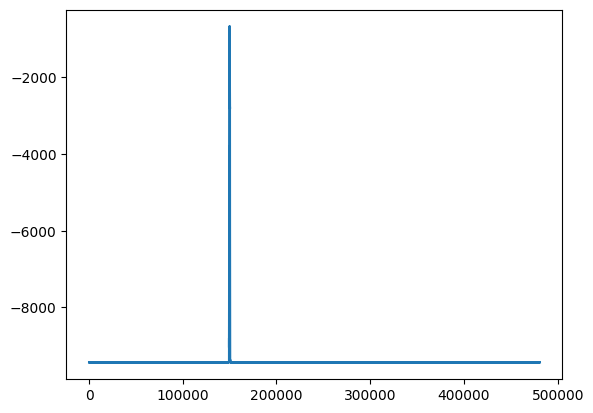

In [31]:
plt.plot(test_df.index, test_df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

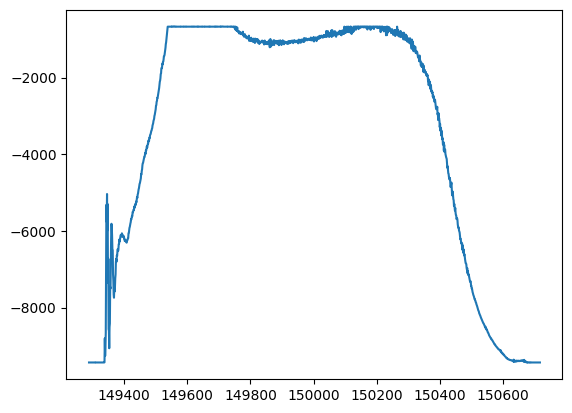

In [32]:
trimmed_test = trim_dataset(test_df)
plt.plot(trimmed_test.index, trimmed_test["Data"])
plt.show

In [33]:
test_df2 = pd.read_csv("2023_Testing_Data/20221210_Fire.csv")
test_df2 = test_df2.drop(columns=['0'])
test_df2.columns = ['Measurement 1', 'Time', 'Measurement 2'] # 336127 


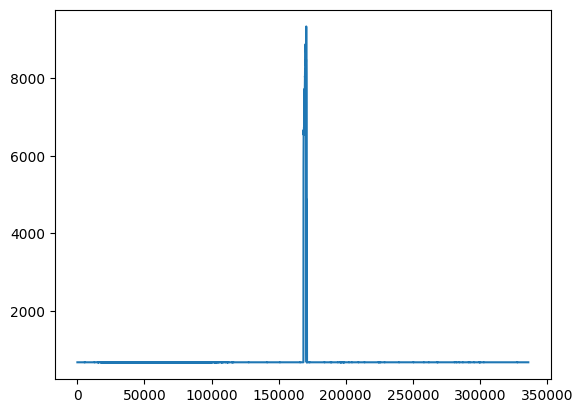

In [34]:
plt.plot(test_df2.index, test_df2['Measurement 1'])
plt.show()

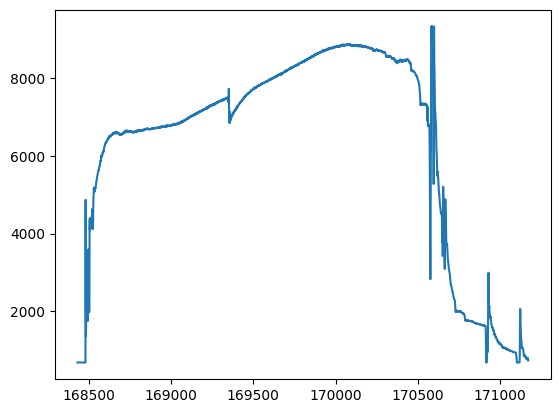

In [35]:
test_df2 = test_df2.drop(columns=['Time'])
test_df2 = test_df2.drop(columns=['Measurement 2'])
test_df2 = trim_dataset(test_df2)
plt.plot(test_df2.index, test_df2['Data'])
plt.show()

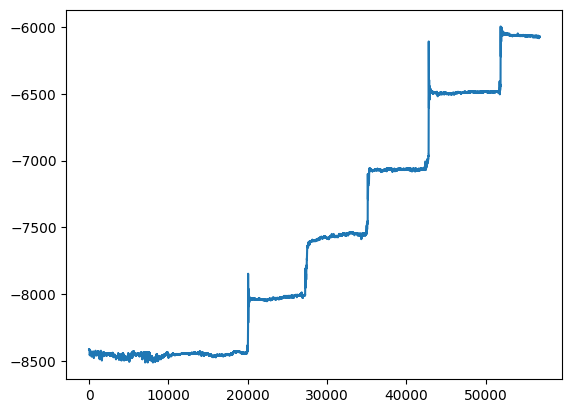

In [36]:
plt.plot(calibration_df.index, calibration_df)
plt.show()

In [37]:
calibration_df.columns = ['Voltage']

window_size = 3 

# Calculate the number of samples for the desired window size (5 samples at 1000 Hz)
window_size_samples = int(window_size * 1000)

# Apply the moving median
calibration_df['Smoothed_Voltage'] = calibration_df['Voltage'].rolling(window=window_size_samples, center=True).median()

# Drop NaN values created by the rolling operation at the edges
calibration_df.dropna(inplace=True)

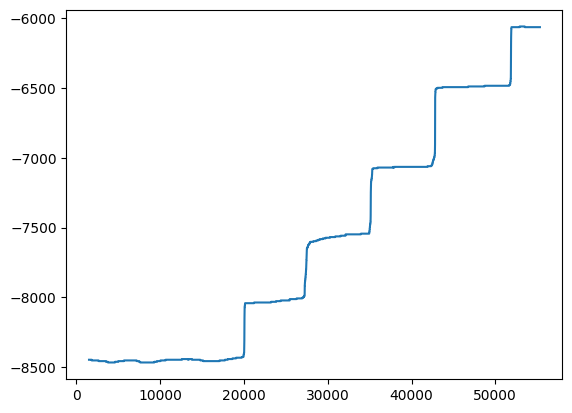

In [38]:
plt.plot(calibration_df.index, calibration_df['Smoothed_Voltage'])
plt.show()  

In [39]:
calibration_df["Derivative"] = calibration_df['Smoothed_Voltage'].diff()
calibration_df

,Voltage,Smoothed_Voltage,Derivative
1500,-8422.851562,-8447.265625,NaN
1501,-8422.851562,-8447.265625,0.0
1502,-8422.851562,-8447.265625,0.0
1503,-8422.851562,-8447.265625,0.0
1504,-8427.734375,-8447.265625,0.0
...,...,...,...
55327,-6064.453125,-6064.453125,0.0
55328,-6064.453125,-6064.453125,0.0
55329,-6069.335938,-6064.453125,0.0
55330,-6069.335938,-6064.453125,0.0


[74, 124, 174, 224, 274, 374, 424, 474, 524, 574, 624, 674, 724, 774, 824, 874, 924, 974, 1024, 1074, 1174, 1224, 1274, 1324, 1374, 1424, 1474, 1524, 1574, 1624, 1674, 1724, 1774, 1824, 1874, 1924, 1974, 2074, 2124, 2174, 2274, 2324, 2374, 2424, 2474, 2524, 2574, 2624, 2674, 2724, 2774, 2824, 2874, 2924, 2974, 3024, 3174, 3224, 3274, 3324, 3374, 3424, 3524, 3574, 3624, 3674, 3724, 3774, 3824, 3874, 3924, 3974, 4024, 4074, 4124, 4224, 4274, 4324, 4374, 4424, 4474, 4524, 4574, 4624, 4674, 4724, 4774, 4824, 4874, 4924, 4974, 5024, 5074, 5124, 5174, 5224, 5274, 5324, 5374, 5424, 5474, 5524, 5574, 5624, 5724, 5774, 5824, 5874, 5924, 6024, 6124, 6174, 6224, 6274, 6324, 6374, 6424, 6474, 6524, 6574, 6624, 6674, 6724, 6774, 6824, 6874, 6924, 6974, 7024, 7074, 7124, 7174, 7224, 7274, 7324, 7374, 7424, 7474, 7524, 7574, 7624, 7674, 7724, 7824, 7874, 7924, 7974, 8024, 8074, 8174, 8224, 8274, 8324, 8374, 8424, 8474, 8574, 8624, 8674, 8724, 8774, 8824, 8874, 8924, 8974, 9024, 9074, 9174, 9224, 9274

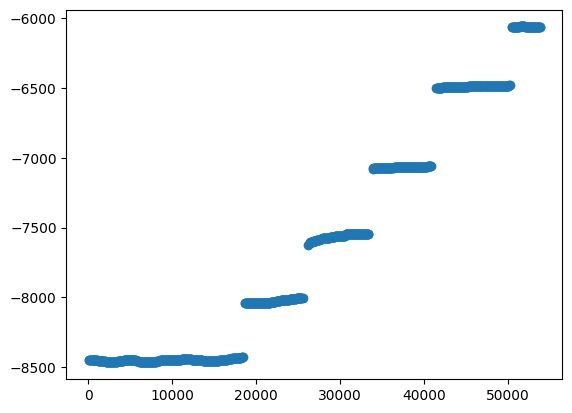

In [41]:
window_size = 50
median_indices = []

for i in range(0, len(calibration_df), window_size):
    window = calibration_df['Derivative'].iloc[i:i+window_size]
    if all(window == 0):
        median_index = (i + i + window_size - 1) // 2  # Calculate the median index
        median_indices.append(median_index)

print(median_indices)
    
new_df = pd.DataFrame({'Median_Index': median_indices, 'Smoothed_Voltage': calibration_df['Smoothed_Voltage'].iloc[median_indices]})

plt.scatter(new_df['Median_Index'], new_df['Smoothed_Voltage'], marker='o')
plt.show()